# KNN no `chb08_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb08_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.758242,0.835165,0.838828,0.882784,0.769231,0.824176,0.846154,0.897436,0.864469,0.901099,0.879121,0.853480,0.765568,0.857143,0.912088,0.846154,0.879121,0.912088
1,0.780220,0.831502,0.857143,0.868132,0.772894,0.842491,0.875458,0.912088,0.857143,0.926740,0.868132,0.908425,0.780220,0.849817,0.915751,0.857143,0.860806,0.923077
2,0.772894,0.827839,0.849817,0.831502,0.794872,0.846154,0.871795,0.879121,0.860806,0.908425,0.890110,0.879121,0.769231,0.842491,0.908425,0.857143,0.879121,0.915751
3,0.743590,0.831502,0.860806,0.868132,0.761905,0.831502,0.835165,0.897436,0.849817,0.882784,0.875458,0.860806,0.714286,0.813187,0.864469,0.824176,0.871795,0.882784
4,0.798535,0.838828,0.838828,0.875458,0.794872,0.827839,0.842491,0.882784,0.857143,0.871795,0.849817,0.886447,0.754579,0.838828,0.893773,0.831502,0.860806,0.882784
5,0.761905,0.824176,0.860806,0.871795,0.791209,0.842491,0.871795,0.879121,0.842491,0.893773,0.875458,0.864469,0.750916,0.827839,0.897436,0.816850,0.849817,0.897436
6,0.776557,0.831502,0.846154,0.853480,0.787546,0.831502,0.857143,0.875458,0.868132,0.846154,0.886447,0.871795,0.758242,0.835165,0.893773,0.882784,0.864469,0.904762
7,0.765568,0.805861,0.846154,0.835165,0.802198,0.824176,0.864469,0.860806,0.831502,0.868132,0.846154,0.882784,0.747253,0.820513,0.882784,0.809524,0.875458,0.901099
8,0.732601,0.835165,0.882784,0.860806,0.820513,0.835165,0.864469,0.886447,0.868132,0.897436,0.893773,0.901099,0.747253,0.868132,0.897436,0.871795,0.897436,0.912088
9,0.747253,0.849817,0.857143,0.860806,0.809524,0.846154,0.857143,0.893773,0.849817,0.893773,0.846154,0.879121,0.717949,0.846154,0.886447,0.805861,0.849817,0.897436


,count,mean,std,min,25%,50%,75%,max
17,20.0,0.902198,0.014560,0.875458,0.892857,0.901099,0.913004,0.930403
14,20.0,0.898352,0.015983,0.864469,0.889194,0.895604,0.908425,0.930403
7,20.0,0.888278,0.013834,0.860806,0.879121,0.890110,0.897436,0.912088
9,20.0,0.887363,0.020373,0.846154,0.874542,0.891941,0.898352,0.926740
11,20.0,0.880220,0.014848,0.853480,0.869963,0.880952,0.890110,0.908425
16,20.0,0.869048,0.015260,0.849817,0.856227,0.868132,0.879121,0.897436
10,20.0,0.866850,0.016264,0.846154,0.849817,0.868132,0.879121,0.893773
6,20.0,0.863919,0.018151,0.831502,0.854396,0.864469,0.872711,0.901099
3,20.0,0.862088,0.015278,0.831502,0.853480,0.866300,0.871795,0.886447
8,20.0,0.852198,0.015599,0.809524,0.845238,0.853480,0.861722,0.879121


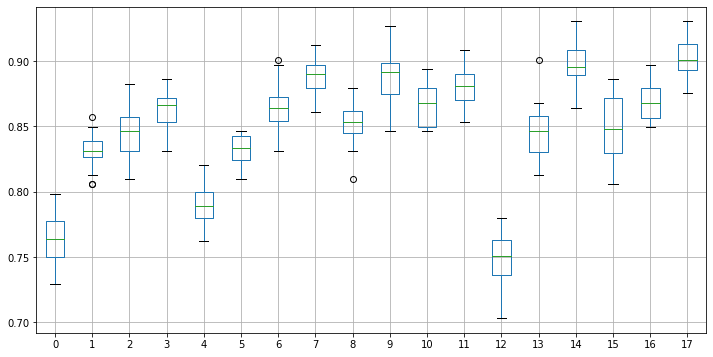

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '08'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.763736,0.018996,0.763736,08,0
1,0.831502,0.013446,0.831502,08,1
2,0.843590,0.017671,0.846154,08,2
3,0.862088,0.015278,0.866300,08,3
4,0.789560,0.015921,0.789377,08,4
5,0.832234,0.011374,0.833333,08,5
6,0.863919,0.018151,0.864469,08,6
7,0.888278,0.013834,0.890110,08,7
8,0.852198,0.015599,0.853480,08,8
9,0.887363,0.020373,0.891941,08,9
